In [22]:
import matplotlib.pyplot as plt
import random
import numpy as np
from statistics import mean, median, mode
from collections import Counter

def dicegram(diceList, sample, advantage=False, disadvantage=False):
  if advantage and disadvantage:
    raise Exception("can't have advantage and disadvantage at the same time")
  history = []
  i = 0
  while len(history) < sample:
    rolls = []
    times = 2 if advantage or disadvantage else 1
    for _ in range(times):
      res = 0
      for d in diceList:
        num, sides, c = d
        for _ in range(num):
          res += random.randint(1, sides)
        res += c
      rolls += [res]
    if advantage:
      history += [max(rolls)]
    elif disadvantage:
      history += [min(rolls)]
    else:
      history += [rolls[0]]
    i = (i + 1) % len(diceList)
  return history

def showPlot(p):
  p = np.array(p)
  d = np.diff(np.unique(p)).min()
  left_of_first_bin = p.min() - float(d)/2
  right_of_last_bin = p.max() + float(d)/2
  plt.hist(p, np.arange(left_of_first_bin, right_of_last_bin + d, d), alpha=0.6, stacked=True)

  # cnt = Counter(p)
  # print(f"Mean: {mean(p)} | Median: {median(p)} | Mode: {mode(p)}")
  # print(cnt)

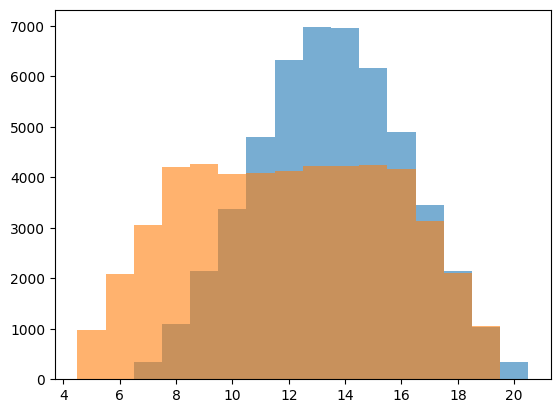

In [23]:

twod6p4 = (2,6,4)
threed6p2 = (3, 6, 2)
oned4p0 = (1,4,0)
oned12p3 = (1,12,3)
jorgorals_greatsword = [twod6p4, oned4p0]
exterminator_axe = [oned12p3, oned4p0]

dice_set = [jorgorals_greatsword, exterminator_axe]
for d in dice_set:
  # print(hist)
  showPlot(dicegram(d, 50000))
plt.show()

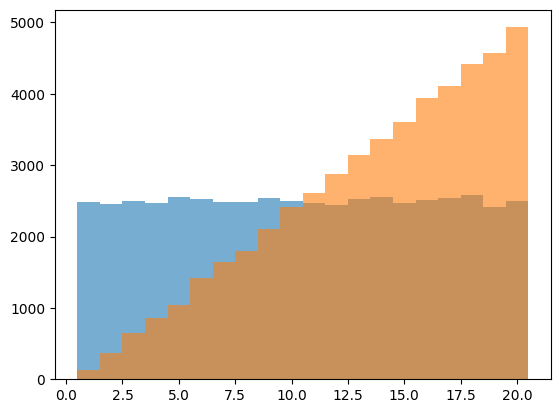

In [24]:
# Advantage vs Disadvantage
d20 = (1, 20, 0)
standard_roll = [d20]
standard = dicegram(standard_roll, 50000)
advantage = dicegram(standard_roll, 50000, advantage=True)
disadvantage = dicegram(standard_roll, 50000, disadvantage=True)

showPlot(standard)
showPlot(advantage)
# showPlot(disadvantage)
plt.show()